In [41]:
import numpy as np
import matplotlib.pyplot as plt
import json
import h5py

# Part a)

In [42]:
params_file_path = "mnist_network_params.hdf5"
input_size = 784
hidden_neurons1 = 200
hidden_neurons2 = 100
output_size = 10

with h5py.File(params_file_path, 'r') as hf:
    b1 = hf["b1"][:]
    W1 = hf["W1"][:]
    b2 = hf["b2"][:]
    W2 = hf["W2"][:]
    b3 = hf["b3"][:]
    W3 = hf["W3"][:]

assert b1.shape[0] == hidden_neurons1, 'Error: wrong dimensions'
assert W1.shape == (hidden_neurons1, input_size), 'Error: wrong dimensions'
assert b2.shape[0] == hidden_neurons2, 'Error: wrong dimensions'
assert W2.shape == (hidden_neurons2, hidden_neurons1), 'Error: wrong dimensions'
assert b3.shape[0] == output_size, 'Error: wrong dimensions'
assert W3.shape == (output_size, hidden_neurons2), 'Error: wrong dimensions'

## Part b)

In [43]:
test_fpath = "mnist_testdata.hdf5"

with h5py.File(test_fpath, 'r') as hf:
    X_test = hf["xdata"][:]
    y_test = hf["ydata"][:]

## Part c)

In [47]:
def ReLU(x):
    return np.maximum(x, 0)

def softmax(x):
    return np.exp(x)/(np.sum(np.exp(x)))

## Part d)

In [81]:
def predict(W_, b_, X, h, out):
    A_curr = X
    for j, (W, b) in enumerate(zip(W_, b_)):
        A_prev = A_curr
        if j == len(W_)-1:
            A_curr = out(np.matmul(W, A_prev)+b.reshape(-1, 1))
        else:
            A_curr = h(np.matmul(W, A_prev)+b.reshape(-1, 1))

    return A_curr

def accuracy(y_hat, y_true):
    y_without_one_hot = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_hat.T, axis=1)

    return np.sum(np.isclose(y_pred, y_without_one_hot))/np.size(y_without_one_hot)

In [82]:
W = [W1, W2, W3]
b = [b1, b2, b3]

pred_data = predict(W, b, X_test.T, ReLU, softmax)
test_accuracy = accuracy(pred_data, y_test)
print(f'The total number of correctly classified points is: {int(test_accuracy*y_test.shape[0])}, for a test accuracy of: {test_accuracy}')

[[-0.04676606 -0.7432499  -0.89800704 ... -0.5056697  -0.21968397
   0.6264842 ]
 [-0.12434147  1.3617387   0.8213851  ... -0.37373757 -0.24041173
  -0.8706932 ]
 [ 0.11705812 -0.56707084 -0.15798393 ...  0.08161549 -0.33307675
  -0.34547558]
 ...
 [ 0.67154044  0.45871648 -0.20191436 ... -0.11021949  0.4332611
  -0.03974548]
 [ 0.11296198 -0.25859082  0.7112756  ...  0.19703871 -1.0872923
   0.75346667]
 [ 0.15800525 -1.4868072   0.9800809  ... -0.26829603 -0.41387236
  -0.04761074]]
[[ 0.9857017   5.9043865   3.331508   ...  0.8624698   0.55312693
   2.9944055 ]
 [ 0.7414726   2.8602679   1.325291   ...  1.9891527   0.88959527
   5.6838984 ]
 [ 0.5055626  -0.34051692 -0.03443816 ... -0.26081187 -0.02871107
  -2.2518198 ]
 ...
 [ 1.7608414   2.0496273   2.1202528  ...  1.0616713  -1.2242094
   2.9358375 ]
 [ 1.1614716   5.075304    0.15898398 ... -3.8665285  -2.0363178
   2.2195299 ]
 [ 0.21516165  1.2171414   0.38013092 ...  2.2413921   0.5345063
   3.4546323 ]]
[[ -0.6834991   -2.55

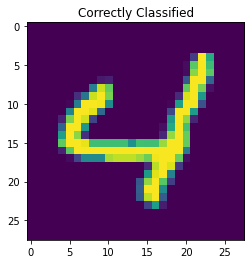

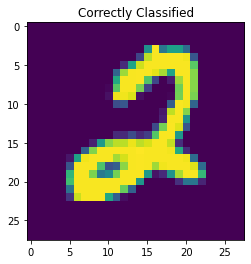

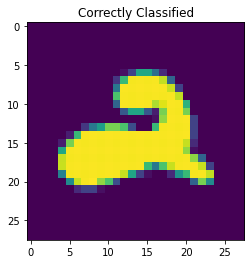

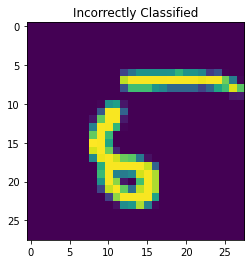

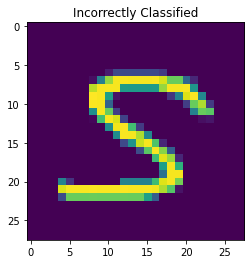

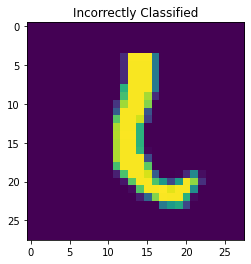

In [63]:
num_correct = 0
num_incorrect = 0
while num_correct+num_incorrect < 6:
    rand_idx = np.random.randint(0, np.size(pred_data))
    y_without_one_hot = np.argmax(y_test, axis=1)
    
    if pred_data[rand_idx]["classification"] == y_without_one_hot[rand_idx] and num_correct <= 2:
        num_correct += 1
        plt.figure()
        plt.imshow(X_test[rand_idx].reshape(28,28))
        plt.title('Correctly Classified')
        plt.savefig(f"Image{rand_idx}.png")
    elif pred_data[rand_idx]["classification"] != y_without_one_hot[rand_idx] and num_incorrect <= 3:
        num_incorrect += 1
        plt.figure()
        plt.imshow(X_test[rand_idx].reshape(28,28))
        plt.title('Incorrectly Classified')
        plt.savefig(f"Image{rand_idx}.png")